# Oppenheimer-Snyder Dust Collapse
---

SUMMARY:

The Oppenheimer-Snyder (OS) solution describes a uniform-density, spherically-symmetric, distribution of pressureless matter (dust) that is initially at rest. The dust ball (or "star") then collapses under the influence of gravity. It turns out that the equations can be solved analytically in this case, which allows one to carefully examine the formation of horizons during gravitational collapse. Various aspects of the solutions are plotted below.

REFERENCES:

- [1] Poisson, *A Relativist's Toolkit: The Mathematics of Black-Hole Mechanics*
- [2] Baumgarte and Shapiro, *Numerical Relativity: Solving Einstein's Equations on the Computer*

## 1. Theory

Consider a spherically-symmetric, uniform density distrubution of an ideal fluid (i.e., "ball of dust"), which we will often refer to as a "star". The star is assumed to be initially at rest and then collapses under its own gravity. Because the matter is pressureless, there are no outward forces to prevent, or slow down, the gravitational collapse. 

The spacetime is comprised of a region inside the star and a region outside. A spatially closed Friedmann-Robertson-Walker metric is used for the interior region:

\begin{align}
  (ds_{-})^2 = -d\tau^2 + a^2(\tau)(d\chi^2 + \chi^2 d\Omega^2)
\end{align}

where $\tau$ is the proper time of observers co-moving with the fluid. The exterior spacetime is the Schwarzschild solution, which may be written in standard Schwarzschild coodinates

\begin{align}
  (ds_{+})^2 = -f(r)dt^2 + f^{-1}(r)dr^2 + r^2 d\Omega^2
\end{align}

where $f(r)\equiv 1 - \frac{2M}{r}$. 

The two spacetimes have to be matched using Israel junction conditions at the stellar surface. This surface, which we may denote by $\Sigma$, is a 2+1 hypersurface of the spacetime. From the interior region, the surface is characterized by $\chi_{0}=\text{constant}$. From the exterior region, the stellar surface is parameterized by $t=T(\tau)$, $r=R(\tau)$. The junction conditions are 

\begin{align}
  [\gamma_{ab}] \equiv \gamma^{(+)}_{ab} - \gamma^{(-)}_{ab} = 0
  \quad,\quad
  [K_{ab}] \equiv K^{(+)}_{ab} - K^{(-)}_{ab} = 0
\end{align}

which say that the spatial metric and extrinsic curvature components, when calculated on either side of $\Sigma$, must match (i.e., there can be no jump, or discontinuity in these functions at the boundary between interior and exterior spacetimes). A careful calculation (see [1]) shows that these junction conditions yield

\begin{align}
  R(\tau) &= a(\tau)\sin\chi_{0} \\
  F(R)\dot{T}(\tau) &= \sqrt{\dot{R}^2(\tau) + F(R)} \equiv \beta(R, \dot{R}) \\
  \dot{\beta}((R,\dot{R}) &= 0 \\
  \beta(R, \dot{R}) R(\tau) &= a(\tau)\sin\chi_{0}\cos\chi_{0}
\end{align}

where $F(R)\equiv 1 - 2M/R(\tau)$. By integrating these, one obtains complete solutions for the spacetime, as well as the evolution of the stellar surface.

## 2. Solutions

The solutions for the collapsing star can be expressed in terms of a conformal time coordinate $\eta$ as:

\begin{align}
  & \tau(\eta) = \frac{1}{2}\sqrt{\frac{R_{0}^3}{2M}}(\eta + \sin\eta) \\
  & R(\eta) = \frac{1}{2}R_{0}(1 + \cos\eta) \\
  & \rho(\eta) = \frac{6M}{\pi R_{0}^3}\frac{1}{(1 + \cos\eta)^3}
\end{align}

where $\tau$ is the proper time experienced by observers co-moving with the collapsing star, $R$ is the outer surface of the star, and $\rho$ is the spatially uniform mass density of the star. From the first equation above, it is easily seen that $R\rightarrow 0$ and $\rho\rightarrow\infty$ as $\eta\rightarrow\pi$. The proper time to collapse is

\begin{align}
  \tau_\mathrm{collapse} \equiv \tau(\pi)
  = \frac{\pi}{2}\sqrt{\frac{R_{0}^3}{2M}}
\end{align}

The solutions for a spherical shell of light, in the interior of the star are:

\begin{align}
  & \chi(\eta) = \chi_{e} + (\eta - \eta_{e}) \\
  & r(\eta) = \frac{1}{2}\sqrt{\frac{R_{0}^3}{2M}}(1 + \cos\eta)\sin(\chi(\eta)) \\
\end{align}

where $\eta_{e}$ and $\chi_{e}$ refer to values at the moment the light shell is emitted.

Solutions for a spherical shell of light in the exterior region may also be obtained. Coordinate time is related to proper time of the stellar surface by the integral

\begin{align}
  t(\eta) = \frac{R_{0}}{2}\sqrt{\frac{R_{0}}{2M} - 1}
  \int^{\eta} \frac{(1 + \cos\eta)^2}{(1 - 4M/R_{0} + \cos\eta)}d\eta \\
\end{align}

Once this is integrated to find $t$, the radial coordinate is found by inverting the relation

\begin{align}
  t - t_{i} = r - r_{i} + 2M\ln\left(\frac{r - 2M}{r_{i} - 2M}\right)
\end{align}

where $t_{i}$ is the coordinate time when the null ray intersects (or is emitted) from the surface of the star, and $r_{i}$ is the radius of the star at that time.

proper time to collapse: tau/M = 5.771474235728388
proper time to horizon crossing: tau/M = 3.9934676574878165


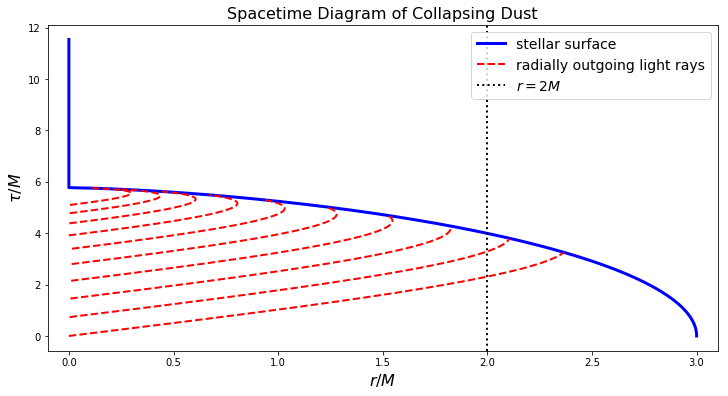

In [2]:
## import libraries
import numpy as np
import matplotlib.pyplot as plt

## scale factor function
def scale_factor(eta, R0, M):
    return 0.5*np.sqrt(R0**3/(2*M))*(1 + np.cos(eta))

## stellar surface function
def stellarR(eta, R0):
    return np.piecewise(eta, [eta < etaCol, eta >= etaCol], 
           [lambda eta: 0.5*R0*(1 + np.cos(eta)),
            lambda eta: 0]) 
## proper time function
def proper_time(eta, R0, M):
    return 0.5*np.sqrt(R0**3/(2*M))*(eta + np.sin(eta))

## light ray function
def lightRay(eta, eta_emit, chi_emit, R0, M):
    chi_exit = np.arcsin(np.sqrt(2*M/R0))
    eta_exit = eta_emit + chi_exit - chi_emit
    return np.piecewise(eta, [eta < eta_emit, (eta >= eta_emit) & (eta <= eta_exit), eta > eta_exit],
           [lambda eta: np.nan,
            lambda eta: scale_factor(eta, R0, M)*np.sin(chi_emit + eta - eta_emit),
            lambda eta: np.nan])

## set initial radius
M = 1
R0 = 3*M

## create time (eta) grid
etaCol = np.pi
etaMin = 0
etaMax = 2*etaCol
nEtaSteps = 1000
eta = np.linspace(etaMin, etaMax, nEtaSteps+1)

## proper time array
tau = proper_time(eta, R0, M)
## proper time to collapse
tauCol = proper_time(etaCol, R0, M)
print("proper time to collapse: tau/M =", tauCol/M)
## proper time to horizon crossing
etaAH = 2*np.arccos(np.sqrt(2*M/R0)) 
tauAH = proper_time(etaAH, R0, M)
print("proper time to horizon crossing: tau/M =", tauAH/M)

## stellar surface array
R = stellarR(eta, R0)

## choose light rays
chi_e = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 
eta_e = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
r1 = lightRay(eta, eta_e[0], chi_e[0], R0, M)
r2 = lightRay(eta, eta_e[1], chi_e[1], R0, M)
r3 = lightRay(eta, eta_e[2], chi_e[2], R0, M)
r4 = lightRay(eta, eta_e[3], chi_e[3], R0, M)
r5 = lightRay(eta, eta_e[4], chi_e[4], R0, M)
r6 = lightRay(eta, eta_e[5], chi_e[5], R0, M)
r7 = lightRay(eta, eta_e[6], chi_e[6], R0, M)
r8 = lightRay(eta, eta_e[7], chi_e[7], R0, M)
r9 = lightRay(eta, eta_e[8], chi_e[8], R0, M)
r10 = lightRay(eta, eta_e[9], chi_e[9], R0, M)

## plot
fig = plt.figure(figsize=(12,6))
#fig.subplots_adjust(left=0.0, right=0.9, bottom=0.1, top=0.9, hspace=0.2, wspace=0.3)
fig.subplots_adjust(wspace=0.5)

ax1 = fig.add_subplot(1,1,1)
ax1.plot(R, tau, color='b', linestyle='-', linewidth=3, label='stellar surface')
ax1.plot(r1, tau, color='r', linestyle='--', linewidth=2, label='radially outgoing light rays')
ax1.plot(r2, tau, color='r', linestyle='--', linewidth=2, label='')
ax1.plot(r3, tau, color='r', linestyle='--', linewidth=2, label='')
ax1.plot(r4, tau, color='r', linestyle='--', linewidth=2, label='')
ax1.plot(r5, tau, color='r', linestyle='--', linewidth=2, label='')
ax1.plot(r6, tau, color='r', linestyle='--', linewidth=2, label='')
ax1.plot(r7, tau, color='r', linestyle='--', linewidth=2, label='')
ax1.plot(r8, tau, color='r', linestyle='--', linewidth=2, label='')
ax1.plot(r9, tau, color='r', linestyle='--', linewidth=2, label='')
ax1.plot(r10, tau, color='r', linestyle='--', linewidth=2, label='')
ax1.axvline(x=2, color='k', linestyle=':', linewidth=2, label=r'$r = 2M$')
ax1.set_xlim(-0.1, R0+0.1)
ax1.set_title('Spacetime Diagram of Collapsing Dust', fontsize=16)
ax1.set_xlabel(r'$r/M$', fontsize=16)
ax1.set_ylabel(r'$\tau/M$', fontsize=16)
ax1.legend(loc='upper right', fontsize=14)
plt.show()

In [3]:
from scipy import integrate

## integrate to get exterior coordinate time
integrand2 = np.zeros_like(eta)
t = np.zeros_like(eta)


for i in range(1,len(eta)):
    integrand2[i] = 0.5*R0*np.sqrt(R0/(2*M) - 1)*(1 + np.cos(eta[i]))**2/(1 - 4*M/R0 + np.cos(eta[i]))
    t[i] = integrate.simps(integrand2[:i], eta[:i])

t

## invert tortoise coordinate relation to get areal radius

array([ 0.00000000e+00,  0.00000000e+00,  1.99931706e-02, ...,
       -2.95629441e+01, -1.39533090e+01, -2.94829687e+01])

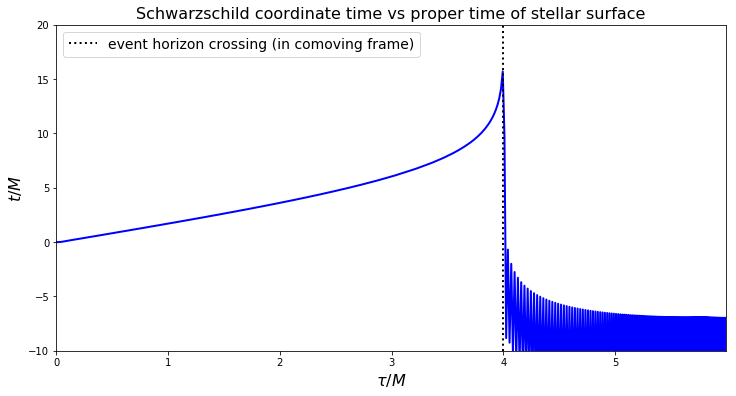

In [4]:
## plot
fig = plt.figure(figsize=(12,6))
#fig.subplots_adjust(left=0.0, right=0.9, bottom=0.1, top=0.9, hspace=0.2, wspace=0.3)
fig.subplots_adjust(wspace=0.5)

ax1 = fig.add_subplot(1,1,1)
ax1.plot(tau, t, color='b', linestyle='-', linewidth=2, label='')
ax1.axvline(x=tauAH, color='k', linestyle=':', linewidth=2, label='event horizon crossing (in comoving frame)')
ax1.set_xlim(0, 1.5*tauAH)
ax1.set_ylim(-10, 20)
ax1.set_title('Schwarzschild coordinate time vs proper time of stellar surface', fontsize=16)
ax1.set_xlabel(r'$\tau/M$', fontsize=16)
ax1.set_ylabel(r'$t/M$', fontsize=16)
ax1.legend(loc='upper left', fontsize=14)
plt.show()

## 3. Horizons

The **event horizon** is a globally defined 2+1 dimensional surface (world tube) that separates spacetime into two regions: a region where radially-outward directed light rays are able to reach future null infinity, and a region where they do not. To locate the event horizon in this case, we need to trace the path of the last light ray to escape to infinity. Since the exterior spacetime is Schwarzschild, this corresponds to the light ray that starts from the origin and intersects the surface of the collapsing star just as it reaches $r=2M$.

The **trapping horizon** is the 2+1 dimensional boundary of any region of trapped surfaces (negative expansion for a radially-outward directed congruence of null geodesics). The intersection of this boundary with a given time slice is called an **apparent horizon**. The apparent horizon is a locally defined quantity, since the expansion for null geodesics can be measured locally at each point on a time slice. The trapping horizon is just the collection of apparent horizons for a particular foliation of the spacetime.

To locate these horizons in this case, we use the analytical results above. Recall that the stellar surface has the solution

\begin{align}
  R(\eta) = \frac{1}{2}R_{0}(1 + \cos\eta)
\end{align}

and for a radially outgoing light ray, moving in the interior of the star, we have

\begin{align}
  & \chi(\eta) = \chi_{e} + (\eta - \eta_{e}) \\
  & r(\eta) = \frac{1}{2}\sqrt{\frac{R_{0}^3}{2M}}(1 + \cos\eta)\sin(\chi(\eta)) \\
\end{align}

The formation of the apparent horizon occurs when the stellar surface crosses $r=2M$ (this will be justified below). Setting $R(\eta_\mathrm{AH})=2M$, the conformal time when this occurs, $\eta_\mathrm{AH}$, is found to be 

\begin{align}
  & \eta_\mathrm{AH} = 2\cos^{-1}\left(\sqrt{\frac{2M}{R_{0}}}\right) \\
\end{align}

To find the conformal time when the event horizon forms, $\eta_\mathrm{EH}$, we have

\begin{align}
  & \chi_0 = 0 + (\eta_\mathrm{AH} - \eta_\mathrm{EH}) \\
\end{align}

which yields

\begin{align}
  & \eta_\mathrm{EH} = 2\cos^{-1}\left(\sqrt{\frac{2M}{R_{0}}}\right) 
  - \sin^{-1}\left(\sqrt{\frac{2M}{R_{0}}}\right) \\
\end{align}

To find the trapping horizon (i.e., collection of apparent horizons), we have the condition

\begin{align}
  \left.\frac{dr}{d\eta}\right|_{\eta=\eta_e} \leq 0
  \quad\Rightarrow\quad
  \eta_e \geq \pi - 2\chi_e
\end{align}

The earliest appearance of the trapped region occurs when $\chi_e=\chi_0$. This yields the same value of $\eta_\mathrm{AH}$ as above. However, there is a small window of time, $\eta_\mathrm{AH} \leq \eta \leq \pi$, for which some values of $\chi<\chi_0$, are not yet inside the trapped region. That is, the trapping horizon forms at $\chi_0$ ($r=2M$) and then steadily moves inwards. This surface is found by using the equality $\eta_e = \pi - 2\chi_e$ and evaluating $r(\eta)=a(\eta)\sin(\chi(\eta))$. This yields

\begin{align}
  r_\mathrm{inner} = \sqrt{\frac{R_{0}^3}{2M}}\cos^{3}(\eta/2)
\end{align}

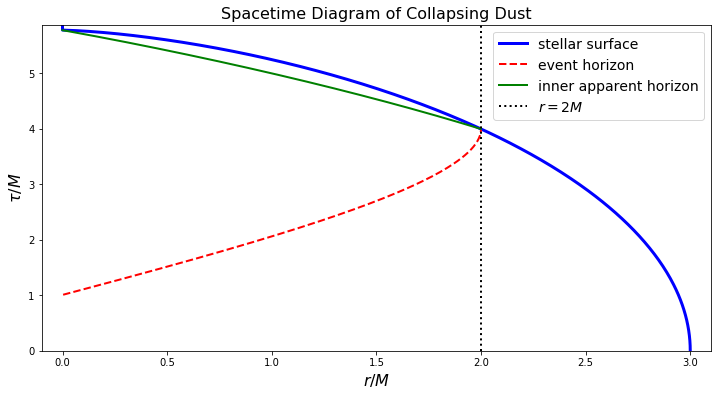

In [4]:
## event horizon light ray
chi0 = np.arcsin(np.sqrt(2*M/R0))
etaEH = etaAH - chi0
chiEH = 0
rEH = lightRay(eta, etaEH, chiEH, R0, M)

## inner apparent horizon
rAH = np.piecewise(eta, [eta < etaAH, (eta >= etaAH) & (eta <= etaCol), eta > etaCol],
                   [lambda eta: np.nan,
                    lambda eta: np.sqrt(R0**3/(2*M))*np.cos(eta/2)**3,
                    lambda eta: np.nan])

## plot
fig = plt.figure(figsize=(12,6))
#fig.subplots_adjust(left=0.0, right=0.9, bottom=0.1, top=0.9, hspace=0.2, wspace=0.3)
fig.subplots_adjust(wspace=0.5)

ax1 = fig.add_subplot(1,1,1)
ax1.plot(R, tau, color='b', linestyle='-', linewidth=3, label='stellar surface')
ax1.plot(rEH, tau, color='r', linestyle='--', linewidth=2, label='event horizon')
ax1.plot(rAH, tau, color='g', linestyle='-', linewidth=2, label='inner apparent horizon')
ax1.axvline(x=2, color='k', linestyle=':', linewidth=2, label=r'$r = 2M$')
ax1.set_xlim(-0.1, R0+0.1)
ax1.set_ylim(0, tauCol+0.1)
ax1.set_title('Spacetime Diagram of Collapsing Dust', fontsize=16)
ax1.set_xlabel(r'$r/M$', fontsize=16)
ax1.set_ylabel(r'$\tau/M$', fontsize=16)
ax1.legend(loc='upper right', fontsize=14)
plt.show()